In [1]:
import pandas as pd # to read CSV files (Comma Separated Values)

train_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.x.csv')
train_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att18,att19,att20,att21,att22,att23,att24,att25,att26,msd_track_id
0,1,41.08,6.579,4.307,3.421,3.192,2.076,2.179,2.052,1.794,...,1.3470,-0.2463,-1.5470,0.17920,-1.1530,-0.7370,0.40750,-0.67190,-0.05147,TRPLTEM128F92E1389
1,2,60.80,5.973,4.344,3.261,2.835,2.725,2.446,1.884,1.962,...,-0.3316,0.3519,-1.4760,0.52700,-2.1960,1.5990,-1.39000,0.22560,-0.72080,TRJWMBQ128F424155E
2,3,51.47,4.971,4.316,2.916,3.112,2.290,2.053,1.934,1.878,...,-0.2803,-0.1603,-0.1355,1.03500,0.2370,1.4890,0.02959,-0.13670,0.10820,TRRZWMO12903CCFCC2
3,4,41.28,6.610,4.411,2.602,2.822,2.126,1.984,1.973,1.945,...,-1.6930,1.0040,-0.3953,0.26710,-1.0450,0.4974,0.03724,1.04500,-0.20000,TRBZRUT12903CE6C04
4,5,54.17,8.945,4.685,4.208,3.154,3.527,2.733,2.202,2.686,...,2.4690,-0.5449,-0.5622,-0.08968,-0.9823,-0.2445,-1.65800,-0.04825,-0.70950,TRLUJQF128F42AF5BF


In [2]:
train_y = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/train.y.csv')
train_y.head()

,Id,class_label
0,1,International
1,2,Vocal
2,3,Latin
3,4,Blues
4,5,Vocal


In [3]:
test_x = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/test.x.csv')
test_x.head()

,Id,att1,att2,att3,att4,att5,att6,att7,att8,att9,...,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26
0,1,38.22,8.076,6.935,4.696,3.856,3.465,2.922,2.568,2.070,...,3.988,0.4957,0.1836,-2.2210,0.6453,-0.2923,1.2000,-0.09179,0.4674,0.2158
1,2,36.42,6.131,5.364,4.292,3.968,2.937,2.872,2.142,2.050,...,7.098,1.2290,0.5971,-1.0670,0.9569,-1.8240,2.3130,-0.80890,0.5612,-0.6225
2,3,70.01,5.496,4.698,3.699,3.258,2.293,2.680,2.226,2.034,...,4.449,0.4773,1.6370,-1.0690,2.4160,-0.6299,1.4190,-0.81960,0.9151,-0.5948
3,4,40.64,7.281,6.702,4.043,3.729,3.043,2.644,2.366,1.940,...,2.785,1.9000,-1.1370,1.2750,1.7920,-2.1250,1.6090,-0.83230,-0.1998,-0.1218
4,5,38.85,7.118,5.703,4.825,4.088,3.823,3.254,2.551,2.193,...,4.536,2.1470,1.0200,-0.2656,2.8050,0.2762,0.2504,1.04900,0.3447,-0.7689


In [4]:
test_y_sample = pd.read_csv(filepath_or_buffer='data/kaggle-music-genre/submission-random.csv')
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991


In [5]:
test_y_sample[:0]

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal


In [6]:
import numpy as np

train_X = np.array(train_x)
train_Y = np.array(train_y[:]['class_label'])
test_X = np.array(test_x)

# Getting rid of the first and the last column: Id and msd_track_id
X_train_val = np.array(train_X[:, 1:-1], dtype=float)
X_test = np.array(test_X[:, 1:], dtype=float)

train_Y.shape

(13000,)

In [7]:
from collections import Counter

# Count the freq of the keys in the training labels
counted_labels = Counter(train_Y)
labels_keys = counted_labels.keys()
labels_keys

dict_keys(['Blues', 'Country', 'Vocal', 'Pop_Rock', 'International', 'New_Age', 'Reggae', 'RnB', 'Electronic', 'Folk', 'Jazz', 'Latin', 'Rap'])

In [8]:
labels_keys_sorted = sorted(labels_keys)
labels_keys_sorted

['Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [9]:
# This for loop for creating a dictionary/ vocab
key_to_val = {key: val for val, key in enumerate(labels_keys_sorted)}
key_to_val['Country']
key_to_val

{'Blues': 0,
 'Country': 1,
 'Electronic': 2,
 'Folk': 3,
 'International': 4,
 'Jazz': 5,
 'Latin': 6,
 'New_Age': 7,
 'Pop_Rock': 8,
 'Rap': 9,
 'Reggae': 10,
 'RnB': 11,
 'Vocal': 12}

In [10]:
val_to_key = {val: key for val, key in enumerate(labels_keys_sorted)}
val_to_key[1]
val_to_key

{0: 'Blues',
 1: 'Country',
 2: 'Electronic',
 3: 'Folk',
 4: 'International',
 5: 'Jazz',
 6: 'Latin',
 7: 'New_Age',
 8: 'Pop_Rock',
 9: 'Rap',
 10: 'Reggae',
 11: 'RnB',
 12: 'Vocal'}

In [11]:
Y_train_vec = []
for each in train_y[:]['class_label']:
#     print(each, key_to_val[each])
    Y_train_vec.append(key_to_val[each])

Y_train_val = np.array(Y_train_vec)
Y_train_val.shape

(13000,)

In [12]:
# # Pre-processing: normalizing
# def normalize(X):
#     # max scale for images 255= 2**8= 8 bit grayscale for each channel
#     return (X - X.mean(axis=0)) #/ X.std(axis=0)
# X_train, X_val, X_test = normalize(X=X_train), normalize(X=X_val), normalize(X=X_test)

# Preprocessing: normalizing the data based on the training set
mean = X_train_val.mean(axis=0)
std = X_train_val.std(axis=0)

X_train_val, X_test = (X_train_val - mean)/ std, (X_test - mean)/ std
X_train_val.shape, X_test.shape, X_train_val.dtype, X_test.dtype

((13000, 26), (10400, 26), dtype('float64'), dtype('float64'))

In [13]:
# Creating validation set: 10% or 1/10 of the training set or whatever dataset with labels/ annotation
valid_size = X_train_val.shape[0]//10
valid_size
X_val = X_train_val[-valid_size:]
Y_val = Y_train_val[-valid_size:]
X_train = X_train_val[: -valid_size]
Y_train = Y_train_val[: -valid_size]
X_train_val.shape, 
X_train.shape, X_val.shape, X_test.shape, Y_val.shape, Y_train.shape 
# X_train.dtype, X_val.dtype
# Y_train.dtype, Y_val

((11700, 26), (1300, 26), (10400, 26), (1300,), (11700,))

In [15]:
# Model
import impl.layer as l # or from impl.layer import *
from impl.loss import * # import all functions from impl.loss file # import impl.loss as loss_func
from sklearn.utils import shuffle as skshuffle

class FFNN:

    def __init__(self, D, C, H, L, keep_prob):
        self.L = L # number of layers or depth
        self.losses = {'train':[], 'train_acc':[], 'valid':[], 'valid_acc':[]}
        self.keep_prob = keep_prob # 1 - p_dropout
        
        # The adaptive/learnable/updatable random feedforward
        self.model = []
        self.grads = []
        low, high = -1, 1
        
        # Input layer: weights/ biases
        m = dict(W=np.random.uniform(size=(D, H), low=low, high=high) / np.sqrt(D / 2.), 
                 b=np.zeros((1, H)))
        self.model.append(m)
        # Input layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[0].items()})

        # Hidden layers: weights/ biases
        m_L = []
        for _ in range(L):
            m = dict(W=np.random.uniform(size=(H, H), low=low, high=high) / np.sqrt(H / 2.), 
                     b=np.zeros((1, H)))
            m_L.append(m)
        self.model.append(m_L)
        # Hidden layer: gradients
        grad_L = []
        for _ in range(L):
            grad_L.append({key: np.zeros_like(val) for key, val in self.model[1][0].items()})
        self.grads.append(grad_L)
        
        # Output layer: weights/ biases
        m = dict(W=np.random.uniform(size=(H, C), low=low, high=high) / np.sqrt(H / 2.), 
                 b=np.zeros((1, C)))
        self.model.append(m)
        # Outout layer: gradients
        self.grads.append({key: np.zeros_like(val) for key, val in self.model[2].items()})
        
    def fc_forward(self, X, W, b):
        out = (X @ W) + b
        cache = (W, X)
        return out, cache

    def fc_backward(self, dout, cache):
        W, X = cache

        dW = X.T @ dout
        db = np.sum(dout, axis=0).reshape(1, -1) # db_1xn
        dX = dout @ W.T # Backprop

        return dX, dW, db

    def train_forward(self, X, train):
        caches, ys = [], []
        
        # Input layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[0]['W'], b=self.model[0]['b']) # X_1xD, y_1xc
#         y, nl_cache = l.tanh_forward(X=y)
#         y, nl_cache = l.relu_forward(X=y)
        y, nl_cache = l.selu_forward(X=y)
        if train:
            y, do_cache = l.selu_dropout_forward(h=y, q=self.keep_prob)
            caches.append((fc_cache, nl_cache, do_cache))
        X = y.copy() # pass to the next layer
        
        # Hidden layers
        fc_caches, nl_caches, do_caches = [], [], []
        for layer in range(self.L):
            y, fc_cache = self.fc_forward(X=X, W=self.model[1][layer]['W'], b=self.model[1][layer]['b'])
#             y, nl_cache = l.tanh_forward(X=y)
#             y, nl_cache = l.relu_forward(X=y)
            y, nl_cache = l.selu_forward(X=y)
            if train:
                y, do_cache = l.selu_dropout_forward(h=y, q=self.keep_prob)
                fc_caches.append(fc_cache)
                nl_caches.append(nl_cache)
                do_caches.append(do_cache)
            X = y.copy() # pass to next layer
        if train:
            caches.append((fc_caches, nl_caches, do_caches)) # caches[1]            
        
        # Output layer
        y, fc_cache = self.fc_forward(X=X, W=self.model[2]['W'], b=self.model[2]['b'])
        # Softmax is included in loss function
        if train:
            caches.append(fc_cache)

        return y, caches # for backpropating the error

    def loss_function(self, y, y_train):
        
        loss = cross_entropy(y, y_train) # softmax is included
        dy = dcross_entropy(y, y_train) # dsoftmax is included
        
        return loss, dy
        
    def train_backward(self, dy, caches):
        grads = self.grads # initialized by Zero in every iteration/epoch
        
        # Output layer
        fc_cache = caches[2]
        # dSoftmax is included in loss function
        dX, dW, db = self.fc_backward(dout=dy, cache=fc_cache)
        dy = dX.copy()
        grads[2]['W'] = dW
        grads[2]['b'] = db

        # Hidden layer
        fc_caches, nl_caches, do_caches = caches[1]
        for layer in reversed(range(self.L)):
            dy = l.selu_dropout_backward(cache=do_caches[layer], dout=dy)
#             dy = l.tanh_backward(cache=nl_caches[layer], dout=dy) # diffable function
#             dy = l.relu_backward(cache=nl_caches[layer], dout=dy) # diffable function
            dy = l.selu_backward(cache=nl_caches[layer], dout=dy) # diffable function
            dX, dW, db = self.fc_backward(dout=dy, cache=fc_caches[layer])
            dy = dX.copy()
            grads[1][layer]['W'] = dW
            grads[1][layer]['b'] = db
        
        # Input layer
        fc_cache, nl_cache, do_cache = caches[0]
        dy = l.selu_dropout_backward(cache=do_cache, dout=dy)
#         dy = l.tanh_backward(cache=nl_cache, dout=dy) # diffable function
#         dy = l.relu_backward(cache=nl_cache, dout=dy) # diffable function
        dy = l.selu_backward(cache=nl_cache, dout=dy) # diffable function
        _, dW, db = self.fc_backward(dout=dy, cache=fc_cache)
        grads[0]['W'] = dW
        grads[0]['b'] = db

        return grads
    
    def test(self, X):
        y_logit, _ = self.train_forward(X, train=False)
        
        # if self.mode == 'classification':
        y_prob = l.softmax(y_logit) # for accuracy == acc
        y_pred = np.argmax(y_prob, axis=1) # for loss ==err
        
        return y_pred, y_logit
        
    def get_minibatch(self, X, y, minibatch_size, shuffle):
        minibatches = []

        if shuffle:
            X, y = skshuffle(X, y)

        for i in range(0, X.shape[0], minibatch_size):
            X_mini = X[i:i + minibatch_size]
            y_mini = y[i:i + minibatch_size]
            minibatches.append((X_mini, y_mini))

        return minibatches

    def sgd(self, train_set, val_set, alpha, mb_size, n_iter, print_after):
        X_train, y_train = train_set
        X_val, y_val = val_set

        # Momentums
        M, R = [], []
        M.append({key: np.zeros_like(val) for key, val in self.model[0].items()})
        R.append({key: np.zeros_like(val) for key, val in self.model[0].items()})

        M_, R_ = [], []
        for layer in range(self.L):
            M_.append({key: np.zeros_like(val) for key, val in self.model[1][layer].items()})
            R_.append({key: np.zeros_like(val) for key, val in self.model[1][layer].items()})
        M.append(M_)
        R.append(R_)

        M.append({key: np.zeros_like(val) for key, val in self.model[2].items()})
        R.append({key: np.zeros_like(val) for key, val in self.model[2].items()})

        # Learning decay
        beta1 = .9
        beta2 = .99

        # Epochs
        for iter in range(1, n_iter + 1):

            # Minibatches
            minibatches = self.get_minibatch(X_train, y_train, mb_size, shuffle=True)
            idx = np.random.randint(0, len(minibatches))
            X_mini, y_mini = minibatches[idx]
            
            # Train the model
            y, caches = self.train_forward(X_mini, train=True)
            _, dy = self.loss_function(y, y_mini)
            grad = self.train_backward(dy, caches) 
            
            # Update the model
            for key in grad[0].keys():
                M[0][key] = l.exp_running_avg(M[0][key], grad[0][key], beta1)
                R[0][key] = l.exp_running_avg(R[0][key], grad[0][key]**2, beta2)
                m_k_hat = M[0][key] / (1. - (beta1**(iter)))
                r_k_hat = R[0][key] / (1. - (beta2**(iter)))
                self.model[0][key] -= alpha * m_k_hat / (np.sqrt(r_k_hat) + l.eps)

            for layer in range(self.L):
                for key in grad[1][layer].keys():
                    M[1][layer][key] = l.exp_running_avg(M[1][layer][key], grad[1][layer][key], beta1)
                    R[1][layer][key] = l.exp_running_avg(R[1][layer][key], grad[1][layer][key]**2, beta2)
                    m_k_hat = M[1][layer][key] / (1. - (beta1**(iter)))
                    r_k_hat = R[1][layer][key] / (1. - (beta2**(iter)))
                    self.model[1][layer][key] -= alpha * m_k_hat / (np.sqrt(r_k_hat) + l.eps)

            for key in grad[2].keys():
                M[2][key] = l.exp_running_avg(M[2][key], grad[2][key], beta1)
                R[2][key] = l.exp_running_avg(R[2][key], grad[2][key]**2, beta2)
                m_k_hat = M[2][key] / (1. - (beta1**(iter)))
                r_k_hat = R[2][key] / (1. - (beta2**(iter)))
                self.model[2][key] -= alpha * m_k_hat / (np.sqrt(r_k_hat) + l.eps)
                
            # Trained model info
            y_pred, y_logit = self.test(X_mini)
            loss, _ = self.loss_function(y_logit, y_mini) # softmax is included in entropy loss function
            self.losses['train'].append(loss)
            acc = np.mean(y_pred == y_mini) # confusion matrix
            self.losses['train_acc'].append(acc)

            # Validated model info
            y_pred, y_logit = self.test(X_val)
            valid_loss, _ = self.loss_function(y_logit, y_val) # softmax is included in entropy loss function
            self.losses['valid'].append(valid_loss)
            valid_acc = np.mean(y_pred == y_val) # confusion matrix
            self.losses['valid_acc'].append(valid_acc)
            
            # Print the model info: loss & accuracy or err & acc
            if iter % print_after == 0:
                print('Iter: {}, train loss: {:.4f}, train acc: {:.4f}, valid loss: {:.4f}, valid acc: {:.4f}'.format(
                    iter, loss, acc, valid_loss, valid_acc))

            #         # Test the final model
            #         y_pred, y_logit = nn.test(X_test)
            #         loss, _ = self.loss_function(y_logit, y_test) # softmax is included in entropy loss function
            #         acc = np.mean(y_pred == y_test)
            #         print('Last iteration - Test accuracy mean: {:.4f}, std: {:.4f}, loss: {:.4f}'.format(
            #             acc.mean(), acc.std(), loss))

In [16]:
Y_train.shape, X_train.shape, X_val.shape, Y_val.shape

((11700,), (11700, 26), (1300, 26), (1300,))

In [30]:
# Hyper-parameters
n_iter = 100000 # number of epochs
alpha = 1e-3 # learning_rate
mb_size = 64 # 2**10==1024 # width, timestep for sequential data or minibatch size
print_after = 100 # n_iter//10 # print loss for train, valid, and test
num_hidden_units = 32 # number of kernels/ filters in each layer
num_input_units = X_train.shape[1] # noise added at the input lavel as input noise we can use dX or for more improvement
num_output_units = Y_train.max() + 1 # number of classes in this classification problem
# num_output_units = Y_train.shape[1] # number of classes in this classification problem
num_layers = 2 # depth
keep_prob = 0.95 # SELU dropout

# Build the model/NN and learn it: running session.
nn = FFNN(C=num_output_units, D=num_input_units, H=num_hidden_units, L=num_layers, keep_prob=keep_prob)

nn.sgd(train_set=(X_train, Y_train), val_set=(X_val, Y_val), mb_size=mb_size, alpha=alpha, 
           n_iter=n_iter, print_after=print_after)

Iter: 100, train loss: 2.2348, train acc: 0.2656, valid loss: 2.1873, valid acc: 0.2577
Iter: 200, train loss: 2.0841, train acc: 0.3125, valid loss: 2.1241, valid acc: 0.2823
Iter: 300, train loss: 1.9221, train acc: 0.3125, valid loss: 2.1000, valid acc: 0.2946
Iter: 400, train loss: 2.0342, train acc: 0.2188, valid loss: 2.0815, valid acc: 0.3062
Iter: 500, train loss: 1.8491, train acc: 0.4375, valid loss: 2.0772, valid acc: 0.3046
Iter: 600, train loss: 2.1459, train acc: 0.3906, valid loss: 2.0800, valid acc: 0.3177
Iter: 700, train loss: 1.9785, train acc: 0.3594, valid loss: 2.0658, valid acc: 0.3162
Iter: 800, train loss: 1.7177, train acc: 0.3594, valid loss: 2.0711, valid acc: 0.3154
Iter: 900, train loss: 2.0029, train acc: 0.4219, valid loss: 2.0629, valid acc: 0.3192
Iter: 1000, train loss: 1.9380, train acc: 0.3281, valid loss: 2.0641, valid acc: 0.3115
Iter: 1100, train loss: 1.8061, train acc: 0.4531, valid loss: 2.0619, valid acc: 0.3215
Iter: 1200, train loss: 2.0008

Iter: 9400, train loss: 1.7615, train acc: 0.4062, valid loss: 1.9764, valid acc: 0.3646
Iter: 9500, train loss: 1.3543, train acc: 0.5625, valid loss: 1.9752, valid acc: 0.3669
Iter: 9600, train loss: 1.8790, train acc: 0.3906, valid loss: 1.9860, valid acc: 0.3623
Iter: 9700, train loss: 1.8520, train acc: 0.3750, valid loss: 1.9743, valid acc: 0.3646
Iter: 9800, train loss: 1.7997, train acc: 0.4531, valid loss: 1.9835, valid acc: 0.3654
Iter: 9900, train loss: 2.0369, train acc: 0.2969, valid loss: 1.9916, valid acc: 0.3623
Iter: 10000, train loss: 1.7792, train acc: 0.4062, valid loss: 1.9775, valid acc: 0.3608
Iter: 10100, train loss: 1.7888, train acc: 0.4375, valid loss: 1.9787, valid acc: 0.3677
Iter: 10200, train loss: 1.8597, train acc: 0.4219, valid loss: 1.9795, valid acc: 0.3662
Iter: 10300, train loss: 1.7453, train acc: 0.4844, valid loss: 1.9870, valid acc: 0.3700
Iter: 10400, train loss: 1.9795, train acc: 0.3594, valid loss: 1.9869, valid acc: 0.3708
Iter: 10500, tra

Iter: 18600, train loss: 1.7941, train acc: 0.4531, valid loss: 2.0117, valid acc: 0.3708
Iter: 18700, train loss: 1.5311, train acc: 0.4688, valid loss: 1.9950, valid acc: 0.3808
Iter: 18800, train loss: 1.7995, train acc: 0.4531, valid loss: 1.9971, valid acc: 0.3708
Iter: 18900, train loss: 2.0592, train acc: 0.2500, valid loss: 1.9971, valid acc: 0.3815
Iter: 19000, train loss: 1.5056, train acc: 0.4844, valid loss: 2.0036, valid acc: 0.3785
Iter: 19100, train loss: 1.7119, train acc: 0.4688, valid loss: 2.0141, valid acc: 0.3700
Iter: 19200, train loss: 1.7175, train acc: 0.3750, valid loss: 1.9973, valid acc: 0.3692
Iter: 19300, train loss: 1.7742, train acc: 0.4062, valid loss: 2.0039, valid acc: 0.3685
Iter: 19400, train loss: 1.6200, train acc: 0.4844, valid loss: 1.9996, valid acc: 0.3746
Iter: 19500, train loss: 1.6497, train acc: 0.3750, valid loss: 1.9956, valid acc: 0.3685
Iter: 19600, train loss: 1.7601, train acc: 0.4062, valid loss: 2.0143, valid acc: 0.3685
Iter: 1970

Iter: 27800, train loss: 1.6126, train acc: 0.4531, valid loss: 2.0194, valid acc: 0.3754
Iter: 27900, train loss: 1.6523, train acc: 0.4219, valid loss: 2.0274, valid acc: 0.3800
Iter: 28000, train loss: 1.9316, train acc: 0.3281, valid loss: 2.0404, valid acc: 0.3685
Iter: 28100, train loss: 1.7737, train acc: 0.4219, valid loss: 2.0158, valid acc: 0.3654
Iter: 28200, train loss: 1.5911, train acc: 0.4844, valid loss: 2.0353, valid acc: 0.3715
Iter: 28300, train loss: 1.7919, train acc: 0.3906, valid loss: 2.0303, valid acc: 0.3662
Iter: 28400, train loss: 1.6420, train acc: 0.4688, valid loss: 2.0372, valid acc: 0.3715
Iter: 28500, train loss: 1.6136, train acc: 0.5000, valid loss: 2.0266, valid acc: 0.3685
Iter: 28600, train loss: 1.9329, train acc: 0.3594, valid loss: 2.0123, valid acc: 0.3762
Iter: 28700, train loss: 2.0278, train acc: 0.3750, valid loss: 2.0299, valid acc: 0.3708
Iter: 28800, train loss: 1.4843, train acc: 0.4844, valid loss: 2.0164, valid acc: 0.3738
Iter: 2890

Iter: 37000, train loss: 1.6821, train acc: 0.4062, valid loss: 2.0390, valid acc: 0.3785
Iter: 37100, train loss: 1.7442, train acc: 0.5312, valid loss: 2.0413, valid acc: 0.3715
Iter: 37200, train loss: 1.5389, train acc: 0.4844, valid loss: 2.0276, valid acc: 0.3808
Iter: 37300, train loss: 1.7964, train acc: 0.4062, valid loss: 2.0408, valid acc: 0.3685
Iter: 37400, train loss: 1.4724, train acc: 0.5781, valid loss: 2.0482, valid acc: 0.3754
Iter: 37500, train loss: 1.8634, train acc: 0.5000, valid loss: 2.0486, valid acc: 0.3762
Iter: 37600, train loss: 1.7755, train acc: 0.4375, valid loss: 2.0447, valid acc: 0.3800
Iter: 37700, train loss: 1.7068, train acc: 0.4062, valid loss: 2.0220, valid acc: 0.3823
Iter: 37800, train loss: 1.6716, train acc: 0.4688, valid loss: 2.0424, valid acc: 0.3769
Iter: 37900, train loss: 1.5158, train acc: 0.5156, valid loss: 2.0579, valid acc: 0.3623
Iter: 38000, train loss: 1.8484, train acc: 0.3750, valid loss: 2.0436, valid acc: 0.3746
Iter: 3810

Iter: 46200, train loss: 1.5307, train acc: 0.4531, valid loss: 2.0763, valid acc: 0.3585
Iter: 46300, train loss: 1.6915, train acc: 0.4531, valid loss: 2.0832, valid acc: 0.3638
Iter: 46400, train loss: 1.4956, train acc: 0.4062, valid loss: 2.0742, valid acc: 0.3677
Iter: 46500, train loss: 1.6944, train acc: 0.4375, valid loss: 2.0754, valid acc: 0.3569
Iter: 46600, train loss: 1.9042, train acc: 0.3594, valid loss: 2.0890, valid acc: 0.3592
Iter: 46700, train loss: 1.6465, train acc: 0.4844, valid loss: 2.0995, valid acc: 0.3615
Iter: 46800, train loss: 1.7711, train acc: 0.3594, valid loss: 2.0749, valid acc: 0.3677
Iter: 46900, train loss: 1.8766, train acc: 0.4219, valid loss: 2.0728, valid acc: 0.3700
Iter: 47000, train loss: 1.5832, train acc: 0.5000, valid loss: 2.0686, valid acc: 0.3615
Iter: 47100, train loss: 1.4672, train acc: 0.4688, valid loss: 2.0613, valid acc: 0.3746
Iter: 47200, train loss: 1.7326, train acc: 0.4844, valid loss: 2.0654, valid acc: 0.3615
Iter: 4730

Iter: 55400, train loss: 1.5619, train acc: 0.5000, valid loss: 2.0853, valid acc: 0.3623
Iter: 55500, train loss: 1.4395, train acc: 0.5000, valid loss: 2.0958, valid acc: 0.3592
Iter: 55600, train loss: 1.3922, train acc: 0.5312, valid loss: 2.0870, valid acc: 0.3708
Iter: 55700, train loss: 1.5410, train acc: 0.4688, valid loss: 2.0813, valid acc: 0.3708
Iter: 55800, train loss: 1.7448, train acc: 0.3906, valid loss: 2.1101, valid acc: 0.3592
Iter: 55900, train loss: 1.8070, train acc: 0.3906, valid loss: 2.0905, valid acc: 0.3646
Iter: 56000, train loss: 1.4626, train acc: 0.5312, valid loss: 2.1040, valid acc: 0.3585
Iter: 56100, train loss: 1.5152, train acc: 0.4844, valid loss: 2.0922, valid acc: 0.3677
Iter: 56200, train loss: 1.5880, train acc: 0.4688, valid loss: 2.0877, valid acc: 0.3669
Iter: 56300, train loss: 1.4628, train acc: 0.5000, valid loss: 2.0948, valid acc: 0.3569
Iter: 56400, train loss: 1.5535, train acc: 0.4219, valid loss: 2.1086, valid acc: 0.3646
Iter: 5650

Iter: 64600, train loss: 1.5064, train acc: 0.4844, valid loss: 2.1057, valid acc: 0.3623
Iter: 64700, train loss: 1.6529, train acc: 0.4219, valid loss: 2.1173, valid acc: 0.3531
Iter: 64800, train loss: 1.4945, train acc: 0.4531, valid loss: 2.1103, valid acc: 0.3569
Iter: 64900, train loss: 1.6431, train acc: 0.5000, valid loss: 2.1177, valid acc: 0.3562
Iter: 65000, train loss: 1.3383, train acc: 0.4844, valid loss: 2.1051, valid acc: 0.3623
Iter: 65100, train loss: 1.4374, train acc: 0.5469, valid loss: 2.1226, valid acc: 0.3723
Iter: 65200, train loss: 1.6495, train acc: 0.4531, valid loss: 2.1232, valid acc: 0.3646
Iter: 65300, train loss: 1.5011, train acc: 0.4688, valid loss: 2.1232, valid acc: 0.3531
Iter: 65400, train loss: 1.5925, train acc: 0.4062, valid loss: 2.1230, valid acc: 0.3562
Iter: 65500, train loss: 1.5991, train acc: 0.4375, valid loss: 2.1145, valid acc: 0.3515
Iter: 65600, train loss: 1.5215, train acc: 0.4844, valid loss: 2.1086, valid acc: 0.3646
Iter: 6570

Iter: 73800, train loss: 1.5757, train acc: 0.4531, valid loss: 2.1289, valid acc: 0.3592
Iter: 73900, train loss: 1.6849, train acc: 0.5000, valid loss: 2.1196, valid acc: 0.3646
Iter: 74000, train loss: 1.8164, train acc: 0.4062, valid loss: 2.1137, valid acc: 0.3623
Iter: 74100, train loss: 1.3983, train acc: 0.6250, valid loss: 2.1211, valid acc: 0.3677
Iter: 74200, train loss: 1.8826, train acc: 0.4038, valid loss: 2.1335, valid acc: 0.3615
Iter: 74300, train loss: 1.4870, train acc: 0.5469, valid loss: 2.1270, valid acc: 0.3600
Iter: 74400, train loss: 1.4099, train acc: 0.4688, valid loss: 2.1285, valid acc: 0.3623
Iter: 74500, train loss: 1.6641, train acc: 0.4688, valid loss: 2.1407, valid acc: 0.3585
Iter: 74600, train loss: 1.7824, train acc: 0.4219, valid loss: 2.1226, valid acc: 0.3538
Iter: 74700, train loss: 1.4376, train acc: 0.5312, valid loss: 2.1360, valid acc: 0.3600
Iter: 74800, train loss: 1.5448, train acc: 0.4688, valid loss: 2.1344, valid acc: 0.3685
Iter: 7490

Iter: 83000, train loss: 1.4160, train acc: 0.5156, valid loss: 2.1414, valid acc: 0.3662
Iter: 83100, train loss: 1.5555, train acc: 0.4688, valid loss: 2.1356, valid acc: 0.3608
Iter: 83200, train loss: 1.4448, train acc: 0.5000, valid loss: 2.1314, valid acc: 0.3638
Iter: 83300, train loss: 1.7113, train acc: 0.4688, valid loss: 2.1406, valid acc: 0.3715
Iter: 83400, train loss: 1.5962, train acc: 0.4531, valid loss: 2.1487, valid acc: 0.3631
Iter: 83500, train loss: 1.2930, train acc: 0.6406, valid loss: 2.1165, valid acc: 0.3708
Iter: 83600, train loss: 1.4032, train acc: 0.5469, valid loss: 2.1513, valid acc: 0.3638
Iter: 83700, train loss: 1.6281, train acc: 0.4375, valid loss: 2.1241, valid acc: 0.3723
Iter: 83800, train loss: 1.3968, train acc: 0.5469, valid loss: 2.1378, valid acc: 0.3662
Iter: 83900, train loss: 1.3333, train acc: 0.6094, valid loss: 2.1425, valid acc: 0.3631
Iter: 84000, train loss: 1.5566, train acc: 0.5625, valid loss: 2.1437, valid acc: 0.3515
Iter: 8410

Iter: 92200, train loss: 1.8101, train acc: 0.4688, valid loss: 2.1564, valid acc: 0.3608
Iter: 92300, train loss: 1.4741, train acc: 0.4219, valid loss: 2.1393, valid acc: 0.3615
Iter: 92400, train loss: 1.5577, train acc: 0.5625, valid loss: 2.1483, valid acc: 0.3569
Iter: 92500, train loss: 1.9222, train acc: 0.4375, valid loss: 2.1516, valid acc: 0.3531
Iter: 92600, train loss: 1.6006, train acc: 0.4375, valid loss: 2.1393, valid acc: 0.3538
Iter: 92700, train loss: 1.5986, train acc: 0.4219, valid loss: 2.1335, valid acc: 0.3662
Iter: 92800, train loss: 1.3686, train acc: 0.5469, valid loss: 2.1516, valid acc: 0.3669
Iter: 92900, train loss: 1.6092, train acc: 0.4531, valid loss: 2.1601, valid acc: 0.3638
Iter: 93000, train loss: 1.5881, train acc: 0.4219, valid loss: 2.1634, valid acc: 0.3654
Iter: 93100, train loss: 1.4061, train acc: 0.4531, valid loss: 2.1521, valid acc: 0.3685
Iter: 93200, train loss: 1.5589, train acc: 0.4062, valid loss: 2.1316, valid acc: 0.3577
Iter: 9330

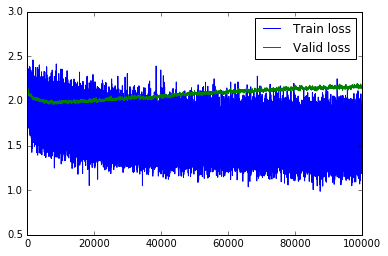

In [31]:
# # Display the learning curve and losses for training, validation, and testing
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(nn.losses['train'], label='Train loss')
plt.plot(nn.losses['valid'], label='Valid loss')
plt.legend()
plt.show()

In [32]:
loss_train = np.array(nn.losses['train'], dtype=float)
loss_valid = np.array(nn.losses['valid'], dtype=float)
loss_train.shape, loss_valid.shape

((100000,), (100000,))

In [33]:
loss_train_norm = (loss_train - loss_train.mean(axis=0))/ loss_train.std(axis=0)
loss_valid_norm = (loss_valid - loss_valid.mean(axis=0))/ loss_valid.std(axis=0)

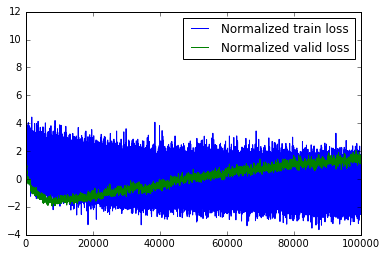

In [34]:
plt.plot(loss_train_norm, label='Normalized train loss')
plt.plot(loss_valid_norm, label='Normalized valid loss')
plt.legend()
plt.show()

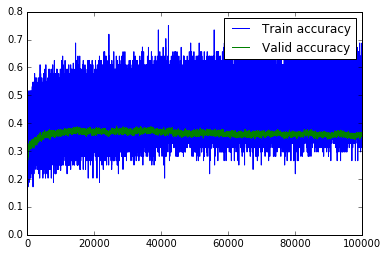

In [35]:
plt.plot(nn.losses['train_acc'], label='Train accuracy')
plt.plot(nn.losses['valid_acc'], label='Valid accuracy')
plt.legend()
plt.show()

In [36]:
heading = labels_keys_sorted.copy()
heading.insert(0, 'Id')
heading

['Id',
 'Blues',
 'Country',
 'Electronic',
 'Folk',
 'International',
 'Jazz',
 'Latin',
 'New_Age',
 'Pop_Rock',
 'Rap',
 'Reggae',
 'RnB',
 'Vocal']

In [37]:
y_pred, y_logits = nn.test(X_test)
y_prob = l.softmax(y_logits)
y_prob.shape, X_test.shape, y_logits.shape, test_y_sample.shape, test_y_sample[:1]

((10400, 13),
 (10400, 26),
 (10400, 13),
 (10400, 14),
    Id   Blues  Country  Electronic    Folk  International    Jazz   Latin  \
 0   1  0.0964   0.0884      0.0121  0.1004         0.0137  0.1214  0.0883   
 
    New_Age  Pop_Rock     Rap  Reggae     RnB   Vocal  
 0   0.0765    0.0332  0.0445  0.1193  0.1019  0.1038  )

In [38]:
pred_list = []
for Id, pred in enumerate(y_prob):
#     print(Id+1, *pred)
    pred_list.append([Id+1, *pred])

In [39]:
pred_file = open(file='prediction.csv', mode='w')
pred_file.write('\n') # because of the previous line        

for idx in range(len(heading)):
    if idx < len(heading) - 1:
        pred_file.write(heading[idx] + ',')
    else:
        pred_file.write(heading[idx] + '\n')        

# len(test), test[0]
# for key in test:
for i in range(len(pred_list)): # rows
    for j in range(len(pred_list[i])): # cols
        if j < (len(pred_list[i]) - 1):
            pred_file.write(str(pred_list[i][j]))
            pred_file.write(',')
        else: # last item before starting a new line
            pred_file.write(str(pred_list[i][j]) + '\n')        

# pred_file.write(-',')
pred_file.close()

In [27]:
pd.read_csv(filepath_or_buffer='prediction.csv').head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.002392,0.004939,0.068574,0.002917,0.013440,0.024538,0.022177,0.008314,0.002323,0.667497,0.164285,0.016776,0.001828
1,2,0.023286,0.004126,0.004385,0.002610,0.012680,0.000987,0.064853,0.000094,0.000486,0.134632,0.743432,0.005079,0.003351
2,3,0.013049,0.002193,0.018545,0.003268,0.048679,0.003299,0.058787,0.001124,0.025355,0.132043,0.632624,0.060300,0.000734
3,4,0.008601,0.010152,0.007329,0.004134,0.029615,0.001186,0.088148,0.000552,0.006381,0.259878,0.564074,0.014082,0.005868
4,5,0.000309,0.000159,0.003329,0.000027,0.004999,0.000007,0.006768,0.000010,0.001107,0.732700,0.250322,0.000262,0.000001


In [28]:
pd.read_csv(filepath_or_buffer='prediction.csv').shape, test_y_sample.shape

((10400, 14), (10400, 14))

In [29]:
test_y_sample.head()

,Id,Blues,Country,Electronic,Folk,International,Jazz,Latin,New_Age,Pop_Rock,Rap,Reggae,RnB,Vocal
0,1,0.0964,0.0884,0.0121,0.1004,0.0137,0.1214,0.0883,0.0765,0.0332,0.0445,0.1193,0.1019,0.1038
1,2,0.0121,0.0804,0.0376,0.0289,0.1310,0.0684,0.1044,0.0118,0.1562,0.0585,0.1633,0.1400,0.0073
2,3,0.1291,0.0985,0.0691,0.0356,0.0788,0.0529,0.1185,0.1057,0.1041,0.0075,0.0481,0.1283,0.0238
3,4,0.0453,0.1234,0.0931,0.0126,0.1224,0.0627,0.0269,0.0764,0.0812,0.1337,0.0357,0.0937,0.0930
4,5,0.0600,0.0915,0.0667,0.0947,0.0509,0.0335,0.1251,0.0202,0.1012,0.0365,0.1310,0.0898,0.0991
